<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook is based on another notebook which contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the original content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

The original code was released under the [MIT license](https://opensource.org/licenses/MIT).

## Seaborn Introduction
Here is an example of a simple random-walk plot in Seaborn.

In [76]:
# Load the necessary libraries
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

Now we create some random walk data and create a simple line chart.

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

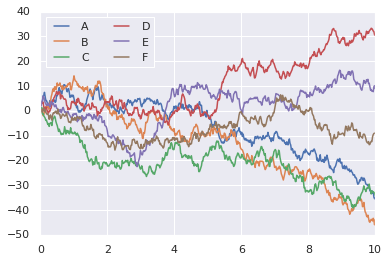

In [80]:
# Create a chart
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Bar plots

Time series can be plotted using ``sns.catplot``. In the following example, we'll use a planetary discovery dataset.

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
len(planets.index)

1035

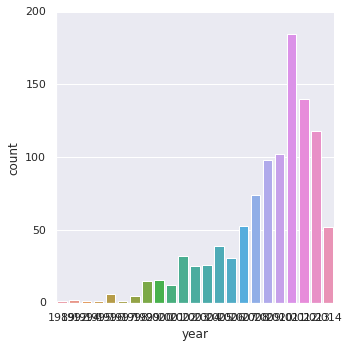

In [ ]:
g = sns.catplot(x = "year", data=planets, kind="count")

Instead of counting the number of planets found by year, we can count the number of planets found by the method of discovery.

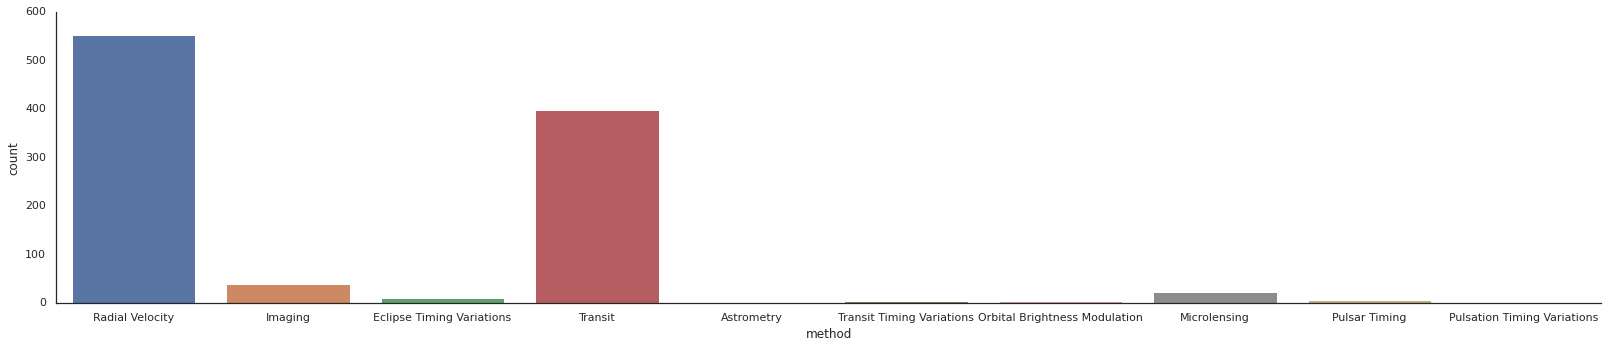

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x = "method", data=planets, kind="count", aspect=4.5)

We can use both the year and method of discovery together in the same plot.

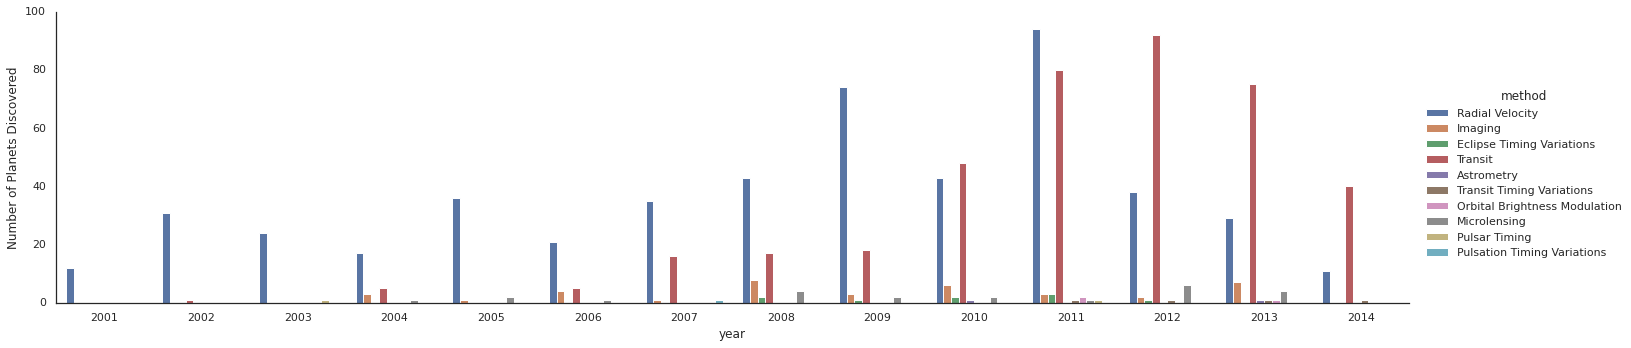

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

In [ ]:
# Generate random data that fits a normal distribution.

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

In [ ]:
data.head(15)

,x,y
0,-0.309450,-1.159599
1,4.302059,2.030911
2,3.938689,2.648107
3,0.045896,-0.136393
4,3.672857,2.531976
5,-2.694072,1.121775
6,0.589760,0.432910
7,-0.037785,-1.335827
8,1.685285,0.482588
9,-0.151016,-1.233135


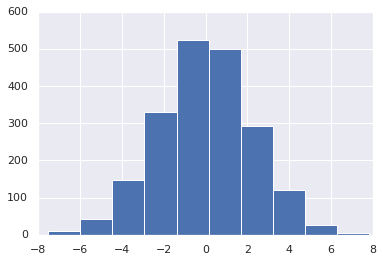

In [77]:
for col in 'x':
    plt.hist(data[col])

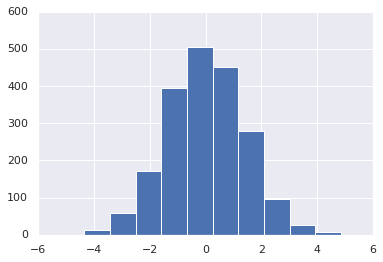

In [78]:
for col in 'y':
    plt.hist(data[col])

As an exercise, can we create a chart with both histograms?

In [ ]:
# Histogram for x and y

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

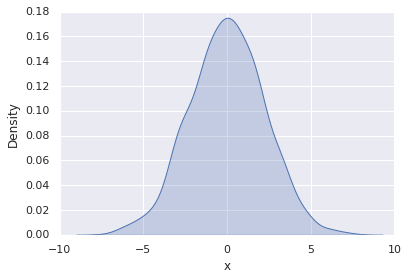

In [79]:
for col in 'x':
    sns.kdeplot(data[col], shade=True)

As an exercise, can we create KDE plots for y? How about x and y on the same plot?

In [ ]:
# KDE plot for y

In [ ]:
# KDE plot for x and y

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.

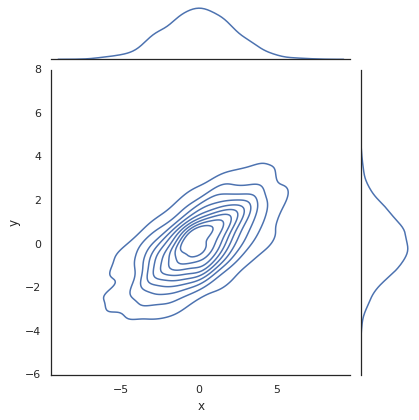

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

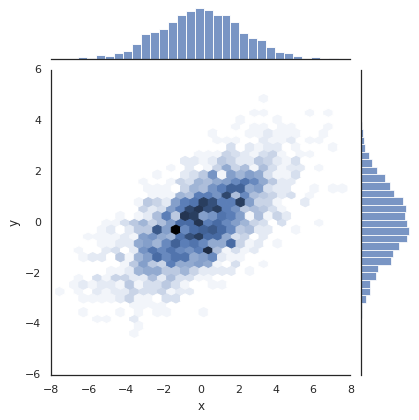

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


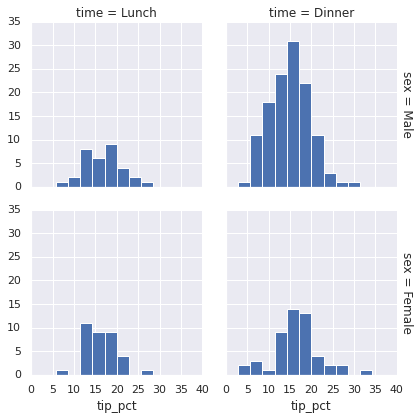

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));